# Lab: Simulate Dice Throws with NumPy 🎲🤖


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Represent a dice

In [2]:
# Define the desired number of sides (try changing this value!)
n_sides = 6

# Represent a dice by using a numpy array
dice = np.array([i for i in range(1, n_sides+1)])

dice

array([1, 2, 3, 4, 5, 6])

## Roll the dice

In [3]:
# Run this cell multiple times (every time you should get a different result at random)
np.random.choice(dice)

np.int64(5)

In [4]:
# Roll the dice 20 times
n_rolls = 20

# Save the result of each roll
rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

rolls

array([2, 1, 2, 5, 2, 1, 1, 6, 2, 2, 2, 2, 1, 1, 3, 6, 2, 1, 3, 5])

In [5]:
# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 2.50
variance of rolls: 2.65


You can even check the distribution of the rolls by plotting a histogram of the NumPy array that holds the result of each throw. For this you will use the plotting library Seaborn, concretely the [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) function:

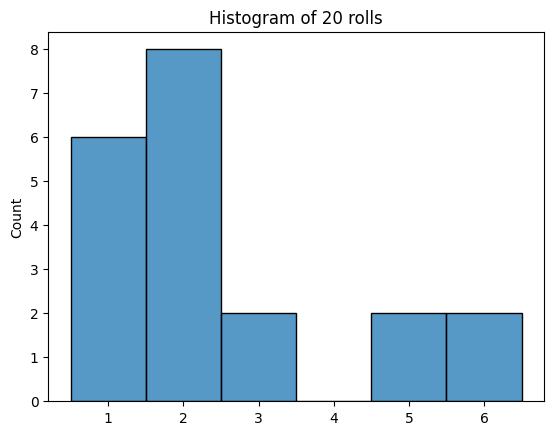

In [6]:
# Display histogram of 20 rolls
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

mean of rolls: 3.48
variance of rolls: 2.92


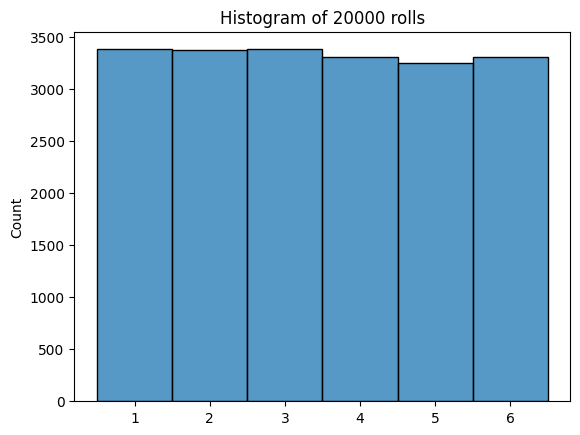

In [7]:
n_rolls = 20_000

rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

print(
    f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")

n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

## Summing the result of rolling twice


mean of first_rolls: 3.49
variance of first_rolls: 2.93

mean of second_rolls: 3.50
variance of second_rolls: 2.87

mean of sum_of_rolls: 7.00
variance of sum_of_rolls: 5.81

covariance between first and second roll:
[[2.93178883 0.00326126]
 [0.00326126 2.87432115]]


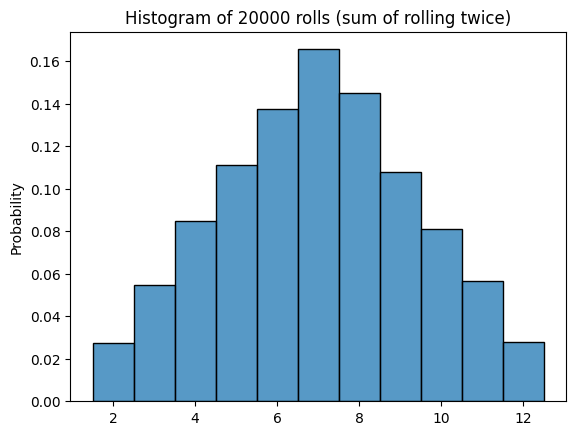

In [8]:
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(
    f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sum_2_rolls_hist = sns.histplot(
    sum_of_rolls, stat="probability", discrete=True)
sum_2_rolls_hist.set(
    title=f"Histogram of {n_rolls} rolls (sum of rolling twice)")
plt.show()

The resulting plot looks pretty Gaussian, as you might expect. Notice that the covariance between the first and second rolls is very close to zero since these two processes are independant of one another.

Also notice that you can change the stat displayed in the histogram by changing the `stat` parameter of the `sns.histplot` function. In the previous exercises you were displaying the frequency but in this latter one you are plotting the probability, which makes more sense in this context. To check what other stats are available you can check the [docs](https://seaborn.pydata.org/generated/seaborn.histplot.html).

## Using loaded dice

So far you have only simulated dice that are fair (all of the sides on them have the same probability of showing up), but what about simulating loaded dice (one or more of the sides have a greater probability of showing up)?

It is actually pretty simple. [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) has support for these kind of scenarios by having a parameter `p` you can set. This parameter controls the probability of selecting each one of the entries in the array.

To see it in action, code a function that returns the probabilities of the dice landing on each side given that one of the sides must have twice as much probability as the rest of them:

In [9]:
def load_dice(n_sides, loaded_number):

    # All probabilities are initially the same
    probs = np.array([1/(n_sides+1) for _ in range(n_sides)])

    # Assign the loaded side a probability that is twice as the other ones
    probs[loaded_number-1] = 1 - sum(probs[:-1])

    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return

    return probs

Before using this function, check how the probabilities of a fair dice would look like:

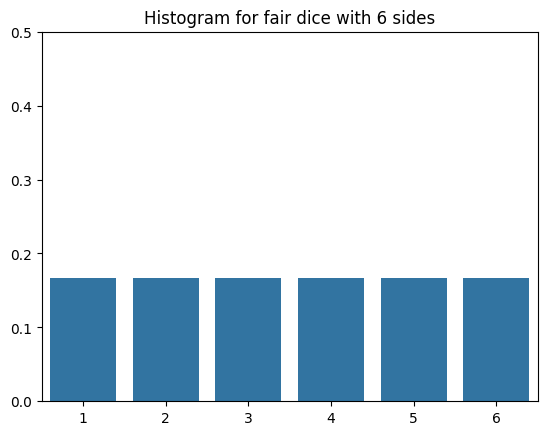

In [10]:
# Compute same probabilities for every side
probs_fair_dice = np.array([1/n_sides]*n_sides)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0, 0.5)
plt.show()

Now get the probabilities by using the `load_dice` function. Try changing the loaded side!

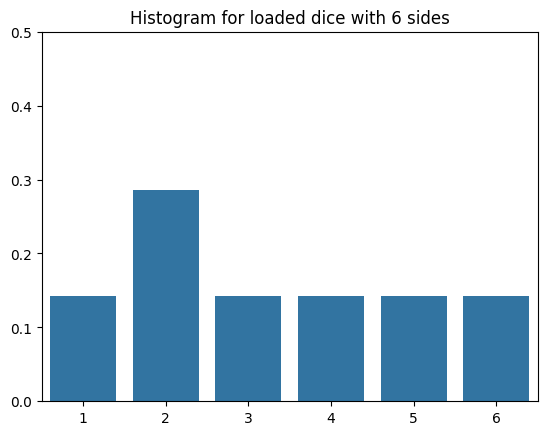

In [11]:
# Get probabilities if dice is loaded towards side 2
probs_loaded_dice = load_dice(n_sides, loaded_number=2)

# Plot probabilities
loaded_dice_sides = sns.barplot(x=dice, y=probs_loaded_dice)
loaded_dice_sides.set(title=f"Histogram for loaded dice with {n_sides} sides")
loaded_dice_sides.set_ylim(0, 0.5)
plt.show()

Now, feed the `probs_loaded_dice` array into `np.random.choice` and see how this affect the metrics and plot:

mean of first_rolls: 3.29
variance of first_rolls: 2.80

mean of second_rolls: 3.27
variance of second_rolls: 2.79

mean of sum_of_rolls: 6.57
variance of sum_of_rolls: 5.52

covariance between first and second roll:
[[ 2.79760059 -0.0343196 ]
 [-0.0343196   2.7920921 ]]


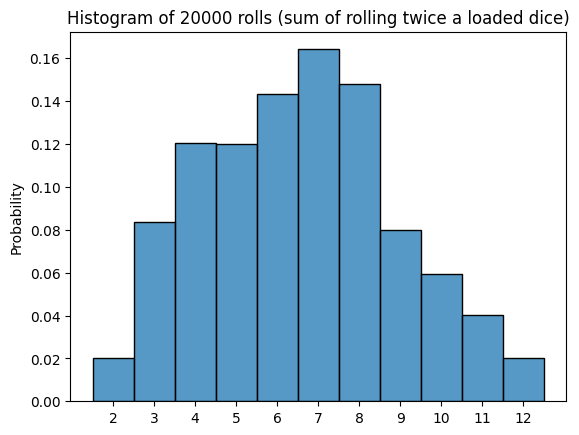

In [12]:
n_rolls = 20_000

# Notice that the p parameter is being set
first_rolls = np.array(
    [np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)])

second_rolls = np.array(
    [np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)])

sum_of_rolls = first_rolls + second_rolls

print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(
    f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
loaded_rolls_hist = sns.histplot(
    sum_of_rolls, stat="probability", discrete=True)
loaded_rolls_hist.set(
    title=f"Histogram of {n_rolls} rolls (sum of rolling twice a loaded dice)")
loaded_rolls_hist.set_xticks(range(min(sum_of_rolls), max(sum_of_rolls)+1))
plt.show()

Now the histogram is skewed towards some values since some sums are now more likely than others. Try changing the loaded side and see how the histogram changes!

Notice that covariance is still very close to zero since there is not any dependance between rolls of the dice.

## Dependant Rolls

To finish this lab you will now simulate the scenario in which the second roll depends on the result of the first one. Say that you are playing a variant of the game you have played so far and you only roll the dice a second time if the result of the first roll is greater or equal to 4.

Before doing the simulations reflect on what might happen in this scenario. Some behavior you will probably see:

- 1 is now a possible result since if you get a 1 in the first roll you don't roll again
- 1, 2 and 3 now have a greater chance of showing up
- 4 is now not a possible result since you need to roll again if you get a 4 in the first roll

To achieve this behaviour you can use the [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function, which given a condition can be used to zero-out the elements that don't meet its criteria:

mean of first_rolls: 3.50
variance of first_rolls: 2.90

mean of second_rolls: 1.75
variance of second_rolls: 4.52

mean of sum_of_rolls: 5.25
variance of sum_of_rolls: 12.64

covariance between first and second roll:
[[2.89624241 2.6121219 ]
 [2.6121219  4.52329516]]


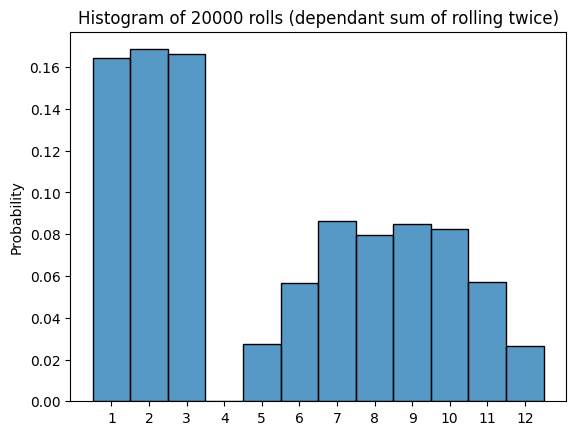

In [13]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls >= 4, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(
    f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(
    sum_of_rolls, stat="probability", discrete=True)
dependant_rolls_hist.set(
    title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls), max(sum_of_rolls)+1))
plt.show()